Загрузка стоп слов для библиотеки nltk

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Чтение файла с данными и получение списка токенов по регулярному выражению

In [86]:
import re

pattern = '[а-яА-Яa-zA-ZёЁ]+'
with open('text.txt', 'r', encoding='utf-8') as f:
  data_text = [el.lower() for el in re.findall(pattern, f.read())]
data_text[:30]

['александр',
 'дюма',
 'граф',
 'монте',
 'кристо',
 'часть',
 'первая',
 'i',
 'марсель',
 'прибытие',
 'двадцать',
 'седьмого',
 'февраля',
 'года',
 'дозорный',
 'нотр',
 'дам',
 'де',
 'ла',
 'гард',
 'дал',
 'знать',
 'о',
 'приближении',
 'трехмачтового',
 'корабля',
 'фараон',
 'идущего',
 'из',
 'смирны']

Фильтрация токенов по стоп-словам

In [69]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import pymorphy2
  
stop_words = set(stopwords.words('russian'))  
filter_text = [el for el in data_text if el not in stop_words]
filter_text[:30]

['александр',
 'дюма',
 'граф',
 'монте',
 'кристо',
 'часть',
 'первая',
 'i',
 'марсель',
 'прибытие',
 'двадцать',
 'седьмого',
 'февраля',
 'года',
 'дозорный',
 'нотр',
 'дам',
 'де',
 'ла',
 'гард',
 'дал',
 'знать',
 'приближении',
 'трехмачтового',
 'корабля',
 'фараон',
 'идущего',
 'смирны',
 'триеста',
 'неаполя']

In [96]:
len(data_text), len(filter_text)

(35520, 21651)

# Получение 3-грамм


In [71]:
from nltk.util import ngrams

n_gram_3 = list(ngrams(filter_text, 3))
n_gram_3[:18]

[('александр', 'дюма', 'граф'),
 ('дюма', 'граф', 'монте'),
 ('граф', 'монте', 'кристо'),
 ('монте', 'кристо', 'часть'),
 ('кристо', 'часть', 'первая'),
 ('часть', 'первая', 'i'),
 ('первая', 'i', 'марсель'),
 ('i', 'марсель', 'прибытие'),
 ('марсель', 'прибытие', 'двадцать'),
 ('прибытие', 'двадцать', 'седьмого'),
 ('двадцать', 'седьмого', 'февраля'),
 ('седьмого', 'февраля', 'года'),
 ('февраля', 'года', 'дозорный'),
 ('года', 'дозорный', 'нотр'),
 ('дозорный', 'нотр', 'дам'),
 ('нотр', 'дам', 'де'),
 ('дам', 'де', 'ла'),
 ('де', 'ла', 'гард')]

Вычисление частоты n-gramm

In [145]:
def sord_dict_by_val(dict_data: dict):
  list_d = list(ngram3.items())
  list_d.sort(key=lambda i: i[1], reverse=True)
  return list_d

def update_cnt_world_dict(dict_word: dict, list_word: list):
  for word in list_word:
    if word not in dict_word.keys():
      dict_word[word] = 1
    else:
      dict_word[word] = dict_word[word] + 1
  return dict_word


ngram3 = update_cnt_world_dict({}, n_gram_3)
ngram1 = {}
for word in ngram3:
  ngram1 = update_cnt_world_dict(ngram1, word)

list_d = list(ngram3.items())
list_d.sort(key=lambda i: i[1])

list(sord_dict_by_val(ngram3))[:5]

[(('господин', 'де', 'вильфор'), 22),
 (('де', 'сен', 'меран'), 12),
 (('помощник', 'королевского', 'прокурора'), 8),
 (('улице', 'сен', 'жак'), 8),
 (('помощника', 'королевского', 'прокурора'), 6)]

Вычисление частоты слов при поиощи nltk

In [95]:
import nltk

thrd = list(nltk.trigrams(filter_text))
lst_thrd = nltk.FreqDist(thrd)

lst_thrd.most_common(5)

[(('господин', 'де', 'вильфор'), 22),
 (('де', 'сен', 'меран'), 12),
 (('помощник', 'королевского', 'прокурора'), 8),
 (('улице', 'сен', 'жак'), 8),
 (('помощника', 'королевского', 'прокурора'), 6)]

# Мера ассоциативности t-score


---


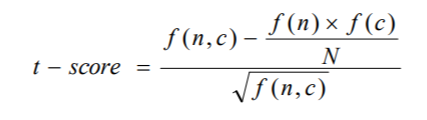



---
n - ключевое слово

с - коллокатор  

f(n, c) — частота встречаемости ключевого слова n в паре с колокатором с

f(n), f(c) — абсолютные частоты ключевого слова n и слова с в корпусе;

N — общее  число словоформ в корпусе




In [108]:
def t_scoce(metrics: dict):
  return (metrics['n'] - metrics['f_n_x_c'] / metrics['N']) / metrics['n']**0.5

res = dict()
for word in ngram3:
  dict_t_score = {}
  dict_t_score['f_n_x_c'] = ngram1[word[0]] * ngram1[word[1]] * ngram1[word[2]]
  dict_t_score['n'] = ngram3[word]
  dict_t_score['N'] = len(ngram3)

  res[word] = t_scoce(dict_t_score)

list(sord_dict_by_val(res))[:30]

[(('господин', 'де', 'вильфор'), 22),
 (('де', 'сен', 'меран'), 12),
 (('помощник', 'королевского', 'прокурора'), 8),
 (('улице', 'сен', 'жак'), 8),
 (('помощника', 'королевского', 'прокурора'), 6),
 (('г', 'н', 'моррель'), 5),
 (('маркиза', 'де', 'сен'), 5),
 (('мадемуазель', 'де', 'сен'), 5),
 (('господин', 'моррель', 'сказал'), 4),
 (('графа', 'де', 'сальвьё'), 4),
 (('господина', 'де', 'вильфора'), 4),
 (('вашему', 'величеству', 'угодно'), 4),
 (('господин', 'моррель', 'отвечал'), 3),
 (('это', 'человек', 'лет'), 3),
 (('море', 'раньше', 'месяца'), 3),
 (('дело', 'сказал', 'кадрусс'), 3),
 (('перо', 'чернил', 'бумаги'), 3),
 (('помощник', 'капитана', 'корабле'), 3),
 (('капитана', 'корабле', 'фараон'), 3),
 (('сказал', 'граф', 'де'), 3),
 (('граф', 'де', 'сальвьё'), 3),
 (('де', 'сен', 'мерана'), 3),
 (('ах', 'господин', 'де'), 3),
 (('де', 'вильфор', 'сказал'), 3),
 (('крайней', 'мере', 'надеюсь'), 3),
 (('черт', 'возьми', 'сказал'), 3),
 (('ваше', 'величество', 'это'), 3),
 (('ск

Проверка работы алгоритма при помощи методов встроенных в библиотеку nltk


In [107]:
import nltk
from nltk.collocations import TrigramAssocMeasures
from nltk.corpus import PlaintextCorpusReader

trigram_measures = TrigramAssocMeasures()

# with open('text.txt') as f:
#   raw = f.read()

# tokens = nltk.word_tokenize(raw,'russian',True)
# print(tokens[:10])

text = nltk.Text(filter_text)
finder_thr = TrigramCollocationFinder.from_words(text)
finder_thr.nbest(TrigramAssocMeasures().student_t, 30)

# print(finder_thr.nbest(trigram_measures.pmi, 10))


[('господин', 'де', 'вильфор'),
 ('де', 'сен', 'меран'),
 ('улице', 'сен', 'жак'),
 ('помощник', 'королевского', 'прокурора'),
 ('помощника', 'королевского', 'прокурора'),
 ('г', 'н', 'моррель'),
 ('мадемуазель', 'де', 'сен'),
 ('маркиза', 'де', 'сен'),
 ('графа', 'де', 'сальвьё'),
 ('вашему', 'величеству', 'угодно'),
 ('господина', 'де', 'вильфора'),
 ('господин', 'моррель', 'сказал'),
 ('перо', 'чернил', 'бумаги'),
 ('море', 'раньше', 'месяца'),
 ('семнадцать', 'месяцев', 'тюрьмы'),
 ('капитана', 'корабле', 'фараон'),
 ('помощник', 'капитана', 'корабле'),
 ('г', 'н', 'нуартье'),
 ('крайней', 'мере', 'надеюсь'),
 ('граф', 'де', 'сальвьё'),
 ('де', 'сен', 'мерана'),
 ('черт', 'возьми', 'сказал'),
 ('ах', 'господин', 'де'),
 ('сказал', 'людовик', 'xviii'),
 ('сказал', 'граф', 'де'),
 ('это', 'человек', 'лет'),
 ('ваше', 'величество', 'отвечал'),
 ('господин', 'моррель', 'отвечал'),
 ('ваше', 'величество', 'это'),
 ('ваше', 'величество', 'сказал')]